In [19]:
import os, sys
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size':11,
                            'font.family':'serif'})

sys.path.append('../code/')

import pandas as pd
from preprocessing import Preprocessor

pd.set_option('display.max_columns', 30)

In [20]:
lower_threshold = 100
upper_threshold = 10000

data_dir = '../data/'

to_encode = ['user_followers_log',
            'user_followees_log',
            'user_account_age_log',
            'user_engagement_log',
            'retweet_delay_log',
            'user_verified']

to_display = ['user_followers',
            'user_followees',
            'user_account_age',
            'user_engagement',
            'retweet_delay']

to_group = ['user_followers',
    		'user_followees',
    		'user_account_age',
    		'user_engagement',
    		'retweet_delay']


# Tweets statistics

In [21]:
tweets = pd.read_csv(data_dir + 'tweets_all.csv')
print(f"Number of tweets: {tweets.shape[0]}")

emos = pd.read_csv(data_dir + 'emotions_all.csv')
tweets = pd.merge(tweets, emos, how = 'inner', on='cascade_id')

Number of tweets: 3128797


In [22]:
tweets.groupby('cascade_id').mean()

,tid,parent_tid,user_account_age,user_verified,user_followers,user_followees,user_engagement,cascade_root_tid,was_retweeted,cascade_size,retweet_delay,root_delay,hour_cos,hour_sin,wd_cos,wd_sin,new_tid,new_parent_tid,depth,sadness,anticipation,disgust,surprise,anger,joy,fear,trust
cascade_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0000,-1.0000,"1,326.0000",0.0000,164.0000,236.0000,7.0924,0.0000,0.0000,1.0000,0.0000,0.0000,0.8544,-0.5196,-1.0000,0.0000,0.0000,-1.0000,0.0000,0.0080,0.0039,0.4829,0.0602,0.3403,0.0177,0.0630,0.0241
18,"630,496.0000",-1.0000,617.0000,0.0000,286.0000,438.0000,3.9289,"630,496.0000",0.0000,1.0000,0.0000,0.0000,-0.5767,-0.8170,0.5000,0.8660,0.0000,-1.0000,0.0000,0.0425,0.2092,0.1398,0.1516,0.0968,0.1750,0.1092,0.0758
24,"637,163.0000",-1.0000,309.0000,0.0000,215.0000,523.0000,3.7882,"637,163.0000",0.0000,1.0000,0.0000,0.0000,0.2035,-0.9791,1.0000,0.0000,0.0000,-1.0000,0.0000,0.0000,0.1662,0.5627,0.0299,0.1853,0.0000,0.0559,0.0000
25,"638,274.0000",-1.0000,"1,294.0000",0.0000,"1,380.0000","1,846.0000",3.2288,"638,274.0000",0.0000,1.0000,0.0000,0.0000,-0.5767,-0.8170,-1.0000,0.0000,0.0000,-1.0000,0.0000,0.0057,0.0860,0.3320,0.1048,0.1929,0.0948,0.1143,0.0695
33,"647,163.0000",-1.0000,"1,479.0000",0.0000,592.0000,"1,973.0000",0.7653,"647,163.0000",0.0000,1.0000,0.0000,0.0000,-0.5767,-0.8170,0.5000,0.8660,0.0000,-1.0000,0.0000,0.0729,0.1636,0.0676,0.1724,0.1280,0.1242,0.1859,0.0854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126297,"568,091.5000","562,675.7342","1,101.9691",0.0013,"1,518.3154",590.4707,16.8119,"560,947.0000",0.0328,"14,290.0000","1,183,583.1269","1,184,625.1294",0.2194,-0.0160,0.3188,-0.4001,"7,144.5000",431.2139,1.6367,0.0192,0.1669,0.1368,0.0991,0.0709,0.0000,0.1319,0.3753
126298,"583,197.5000","578,203.4714","1,096.4261",0.0014,"1,515.2161",596.2645,16.9015,"575,237.0000",0.0348,"15,922.0000","1,188,372.3028","1,188,939.1401",0.2186,0.0606,0.5396,0.1258,"7,960.5000",377.3477,1.5249,0.0596,0.0627,0.2184,0.1495,0.3172,0.0297,0.0583,0.1046
126299,"596,417.5000","592,292.6063","1,088.7346",0.0010,"1,609.2312",596.5572,16.6043,"591,159.0000",0.0271,"10,518.0000","1,187,156.7718","1,187,781.2365",0.1886,0.0980,-0.0481,-0.4847,"5,258.5000",238.8039,1.5951,0.0352,0.1528,0.1575,0.1995,0.2610,0.0364,0.1263,0.0313


In [18]:
pd.options.display.float_format = '{:,.4f}'.format
tweets.describe()

,tid,cascade_id,parent_tid,user_account_age,user_verified,user_followers,user_followees,user_engagement,cascade_root_tid,was_retweeted,cascade_size,retweet_delay,root_delay,hour_cos,hour_sin,wd_cos,wd_sin,new_tid,new_parent_tid,depth,sadness,anticipation,disgust,surprise,anger,joy,fear,trust
count,"1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000","1,905,051.0000"
mean,"2,043,961.8259","82,199.1638","2,040,992.5089","1,042.8350",0.0019,"2,471.1099",990.6910,18.4103,"2,042,407.9593",0.1706,"3,108.7332","684,072.3064","849,426.2285",0.2460,-0.1153,0.0975,0.0263,"1,553.8666",416.6811,1.6171,0.0668,0.1364,0.2208,0.1531,0.1376,0.0867,0.0933,0.1054
std,"753,976.2724",448.1442,"755,842.4541",688.8148,0.0436,"92,726.4028","4,583.1238",30.3883,"753,295.3974",0.3761,"2,681.4197","3,563,295.9717","3,998,171.8732",0.6714,0.6895,0.7447,0.6597,"1,789.4197","1,116.7295",1.2289,0.0332,0.0549,0.0822,0.0728,0.0515,0.0567,0.0529,0.0468
min,"896,850.0000","80,150.0000",-1.0000,21.0000,0.0000,0.0000,0.0000,0.0001,"896,850.0000",0.0000,100.0000,0.0000,0.0000,-0.9907,-0.9977,-1.0000,-0.8660,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,"1,445,973.5000","82,066.0000","1,444,491.0000",486.0000,0.0000,185.0000,205.0000,3.2070,"1,445,616.0000",0.0000,806.0000,"1,193.0000","3,339.0000",-0.3349,-0.8170,-0.5000,-0.8660,257.0000,0.0000,1.0000,0.0489,0.1017,0.1678,0.1132,0.1087,0.0537,0.0638,0.0775
50%,"1,980,238.0000","82,362.0000","1,978,122.0000",937.0000,0.0000,394.0000,383.0000,8.9864,"1,978,122.0000",0.0000,"2,312.0000","9,845.0000","25,769.0000",0.4601,-0.1362,0.5000,0.0000,850.0000,0.0000,1.0000,0.0621,0.1324,0.2217,0.1336,0.1377,0.0709,0.0847,0.1034
75%,"2,492,165.5000","82,487.0000","2,490,616.0000","1,490.0000",0.0000,828.0000,769.0000,21.3913,"2,486,830.0000",0.0000,"4,903.0000","88,652.0000","168,122.0000",0.8544,0.5196,1.0000,0.8660,"2,229.0000",106.0000,2.0000,0.0789,0.1625,0.2638,0.1707,0.1607,0.1036,0.1104,0.1262
max,"3,977,685.0000","82,961.0000","3,977,682.0000","3,711.0000",1.0000,"39,245,976.0000","744,098.0000","1,113.5690","3,977,571.0000",1.0000,"9,990.0000","129,699,423.0000","129,699,423.0000",1.0000,0.9977,1.0000,0.8660,"9,989.0000","9,987.0000",24.0000,0.3304,0.4795,1.0000,1.0000,0.4665,0.9958,0.6631,0.4580


# Cascade statistics

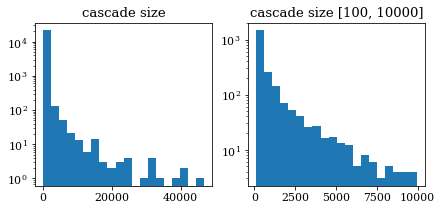

In [36]:
cascade_size = pd.read_csv(data_dir + 'cascade_size.csv')
cascade_size_filtered = cascade_size[(cascade_size.cascade_size >= lower_threshold) & (cascade_size.cascade_size <= upper_threshold)].reset_index(drop=True)

f = plt.figure(figsize=(7,3))

plt.subplot(121)
plt.hist(cascade_size['cascade_size'], bins=20, log=True, range = [cascade_size['cascade_size'].min(), cascade_size['cascade_size'].max()])
plt.title('cascade size')

plt.subplot(122)
plt.hist(cascade_size_filtered['cascade_size'], bins=20, log=True, range = [cascade_size_filtered['cascade_size'].min(), cascade_size_filtered['cascade_size'].max()])
plt.title('cascade size [100, 10000]')

plt.subplots_adjust(wspace=0.2)

plt.show()

f.savefig("../plots/cascade_size.pdf")

In [26]:
cascades = tweets.groupby('cascade_id').mean()

In [31]:
cascade_size.dtypes

cascade_id            int64
cascade_size          int64
cascade_size_log    float64
category              int64
dtype: object

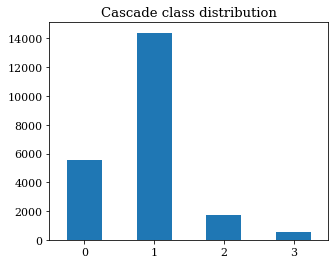

In [35]:
fig, ax = plt.subplots(figsize=(5,4))
cascade_size['category'].value_counts(sort=False).plot(kind='bar', ax=ax, rot=0)
ax.set_title('Cascade class distribution')
fig.savefig('../plots/class_distibution.pdf')
